In [4]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from scipy.special import expit
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import numpy as np

In [5]:
# Loading in data
data = pd.read_csv("inputsong3.csv")

# Delete non-number columns
data = data.drop(['Artist'], axis=1)
data = data.drop(['Album'], axis=1)
data = data.drop(['Track ID'], axis=1)
data = data.drop(['Track'], axis=1)

In [6]:
# Mapping Keys to numbers
key_di = {0: "C",0: "B#", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 5: "E#", 6: "F#", 
          7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}
data.replace({"Key": key_di})
data = data.drop(['Key'], axis=1)
data.head()

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,2013,31,0.455,0.972,9,-3.025,1,0.1870,0.000193,0.000229,0.387,0.102,133.034,4
1,2011,73,0.733,0.899,0,-4.237,1,0.1430,0.004960,0.000047,0.372,0.760,127.086,4
2,1998,39,0.632,0.926,7,-5.954,1,0.1270,0.008900,0.466000,0.367,0.777,168.284,4
3,1998,30,0.747,0.868,11,-6.360,0,0.0613,0.002470,0.174000,0.494,0.485,110.950,4
4,2000,57,0.690,0.664,5,-7.715,0,0.0542,0.000447,0.034300,0.073,0.630,87.287,4


In [21]:
# Split training, testing, validation data by 80%, 10%, 10%
train_data, validate_data, test_data = np.split(data.sample(frac=1), [int(.8*len(data)), int(.9*len(data))])

In [8]:
# Split output and convert to array
train_output = train_data.Popularity
train_data = train_data.drop(['Popularity'], axis=1)
train_data = np.asarray(train_data,dtype=np.float64)
training_count = len(train_data[:,0])

validate_output = validate_data.Popularity
validate_data = validate_data.drop(['Popularity'], axis=1)
validate_data = np.asarray(validate_data,dtype=np.float64)
validate_count = len(validate_data[:,0])

test_output = test_data.Popularity
test_data = test_data.drop(['Popularity'], axis=1)
test_data = np.asarray(test_data,dtype=np.float64)
test_count = len(test_data[:,0])
print(training_count)
print(validate_count)
print(test_count)

48835
6104
6105


In [10]:
#class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), 
# activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
# learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, 
# shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
# momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
# beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

mlp = MLPClassifier(hidden_layer_sizes=(14, ),solver='adam', activation='logistic',max_iter=1000)
mlp.fit(train_data,train_output)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [11]:
test_pred = mlp.predict(test_data)
print(test_pred[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
valid_pred = mlp.predict(validate_data)
print(valid_pred[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
print("Training set score: {}".format(mlp.score(train_data,train_output)))

Training set score: 0.03466775877956384


In [14]:
print("Testing set score: {}".format(mlp.score(test_data,test_output)))

Testing set score: 0.03407043407043407


In [15]:
print("Validation set score: {}".format(mlp.score(validate_data,validate_output)))

Validation set score: 0.03915465268676278


In [16]:
#probability to each label
print("Distribution of probability on validation set: {}".format(mlp.predict_proba(validate_data[:2])))

Testing set score: [[3.32407348e-02 1.85839873e-02 1.99051280e-02 2.01230031e-02
  1.94163457e-02 1.92227516e-02 1.90827799e-02 1.96913621e-02
  1.98017189e-02 1.95539544e-02 1.84644589e-02 2.02311505e-02
  2.16394722e-02 1.92783536e-02 2.02468588e-02 1.94774273e-02
  1.76904688e-02 2.18833373e-02 2.34779877e-02 2.32868797e-02
  2.12737921e-02 2.34840103e-02 2.10489816e-02 2.26548241e-02
  1.99827394e-02 2.14857976e-02 2.08998958e-02 1.84153410e-02
  1.90881997e-02 1.85368298e-02 1.75192048e-02 1.48179552e-02
  1.69979311e-02 1.58453839e-02 1.54576022e-02 1.47958204e-02
  1.42967108e-02 1.27342907e-02 1.28002599e-02 1.25304256e-02
  1.25391986e-02 1.36021934e-02 1.25516101e-02 1.16416446e-02
  1.00186105e-02 1.04199231e-02 9.85764822e-03 9.62992379e-03
  9.30141581e-03 8.55487012e-03 8.24680613e-03 8.28410739e-03
  7.07268718e-03 7.99987273e-03 5.97735654e-03 6.18434813e-03
  5.70206688e-03 6.16082031e-03 4.95392884e-03 5.67874762e-03
  5.56658071e-03 4.77354685e-03 4.06456936e-03 3.98

In [17]:
print(classification_report(validate_output,mlp.predict(validate_data)))

              precision    recall  f1-score   support

           0       0.04      1.00      0.08       239
           1       0.00      0.00      0.00       109
           2       0.00      0.00      0.00       111
           3       0.00      0.00      0.00       129
           4       0.00      0.00      0.00       115
           5       0.00      0.00      0.00       136
           6       0.00      0.00      0.00       114
           7       0.00      0.00      0.00       132
           8       0.00      0.00      0.00       131
           9       0.00      0.00      0.00       119
          10       0.00      0.00      0.00       110
          11       0.00      0.00      0.00       132
          12       0.00      0.00      0.00       129
          13       0.00      0.00      0.00       123
          14       0.00      0.00      0.00       127
          15       0.00      0.00      0.00       130
          16       0.00      0.00      0.00       127
          17       0.00    

/Users/lin_peihsuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print("accuracy score of training: {}".format(accuracy_score(train_output,mlp.predict(train_data))))
print("accuracy score of testing: {}".format(accuracy_score(test_output,mlp.predict(test_data))))
print("accuracy score of validating: {}".format(accuracy_score(validate_output,mlp.predict(validate_data))))

accuracy score of training: 0.03466775877956384
accuracy score of testing: 0.03407043407043407
accuracy score of validating: 0.03915465268676278


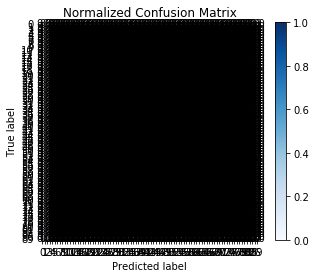

In [19]:
skplt.metrics.plot_confusion_matrix(validate_output, valid_pred, normalize=True)